# Step 0: copy data

In [3]:
# %load_ext line_profiler
%load_ext autoreload
%autoreload 2

from DLC_for_WBFM.utils.preprocessing.utils_tif import PreprocessingSettings
from DLC_for_WBFM.utils.projects.utils_data_subsets import write_data_subset_from_config
from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from pathlib import Path
from DLC_for_WBFM.utils.projects.utils_filepaths import resolve_mounted_path_in_current_os
import zarr
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
project_path = r"Y:/shared_projects/wbfm/dlc_stacks/Charlie-gfp/project_config.yaml"

cfg = load_config(project_path)
project_dir = Path(project_path).parent

fname = Path(resolve_mounted_path_in_current_os(cfg['red_bigtiff_fname']))
out_fname_red = fname.with_name(fname.name + "_preprocessed").with_suffix('.zarr')

fname = Path(resolve_mounted_path_in_current_os(cfg['green_bigtiff_fname']))
out_fname_green = fname.with_name(fname.name + "_preprocessed").with_suffix('.zarr')
DEBUG=True

_config = {'cfg':cfg, 'project_path':project_path, 'project_dir':project_dir, 'out_fname_red':out_fname_red, 'out_fname_green':out_fname_green, 'DEBUG':DEBUG}


Checking path Y:\shared_projects\wbfm\dat\ZIM2278_GFP_Control\2021-03-04_14-53-15_worm2_ZIM2278_low\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.btf on os nt...
Resolved path to Y:\shared_projects\wbfm\dat\ZIM2278_GFP_Control\2021-03-04_14-53-15_worm2_ZIM2278_low\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.btf
Checking path Y:\shared_projects\wbfm\dat\ZIM2278_GFP_Control\2021-03-04_14-53-15_worm2_ZIM2278_low\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-1-pco_camera2\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-1-pco_camera2bigtiff.btf on os nt...
Resolved path to Y:\shared_projects\wbfm\dat\ZIM2278_GFP_Control\2021-03-04_14-53-15_worm2_ZIM2278_low\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-1-pco_camera2\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-1-pco_camera2bigtiff.btf


In [12]:
opt = {'tiff_not_zarr': False,
       'pad_to_align_with_original': False,
       'use_preprocessed_data': False,
       'DEBUG': _config['DEBUG']}
cfg = _config['cfg']
cfg['project_dir'] = _config['project_dir']
cfg['project_path'] = _config['project_path']

with safe_cd(_config['project_dir']):

    preprocessing_fname = cfg['preprocessing_config']
    preprocessing_settings = PreprocessingSettings.load_from_yaml(preprocessing_fname)

    opt['out_fname'] = _config['out_fname_red']
    opt['save_fname_in_red_not_green'] = True
    # The preprocessing will be calculated based off the red channel, and will be saved to disk
    red_name = Path(opt['out_fname'])
    fname = red_name.parent / (red_name.stem + "_preprocessed.pickle")
    preprocessing_settings.path_to_previous_warp_matrices = fname
    preprocessing_settings.do_mirroring = False
    assert preprocessing_settings.to_save_warp_matrices
    write_data_subset_from_config(cfg, preprocessing_settings=preprocessing_settings, **opt)

    # Now the green channel will read the artifact as saved above
    opt['out_fname'] = _config['out_fname_green']
    opt['save_fname_in_red_not_green'] = False
    preprocessing_settings.to_use_previous_warp_matrices = True
    # preprocessing_settings.do_mirroring = False
    if cfg['dataset_params']['red_and_green_mirrored']:
        preprocessing_settings.do_mirroring = True
    write_data_subset_from_config(cfg, preprocessing_settings=preprocessing_settings, **opt)

    # Save the warp matrices to disk if needed further
    preprocessing_settings.save_all_warp_matrices()
    # preprocessing_settings.write_to_yaml(preprocessing_fname)

Checking path Y:\shared_projects\wbfm\dat\ZIM2278_GFP_Control\2021-03-04_14-53-15_worm2_ZIM2278_low\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.btf on os nt...
Resolved path to Y:\shared_projects\wbfm\dat\ZIM2278_GFP_Control\2021-03-04_14-53-15_worm2_ZIM2278_low\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.btf
Preprocessing data, this could take a while...
DEBUG MODE: Applying preprocessing:
PreprocessingSettings(do_filtering=False, filter_opt={'high_freq': 2.0, 'low_freq': 5000.0}, do_mini_max_projection=False, mini_max_size=3, do_mirroring=False, do_rigid_alignment=True, initial_dtype='uint16', final_dtype='uint8', alpha=0.15, to_save_warp_matrices=True, to_use_previous_warp_matrices=False, path_to_previous_warp_matrices=WindowsPath('Y:/shared_projects/wbfm/dat/ZIM2278_GFP_Control/2021-03-04_14-53-15_worm2_ZIM2278_low/202

  0%|          | 0/2 [00:00<?, ?it/s]

Writing array of size: (2, 32, 700, 900)
Chunk size: (1, 32, 700, 900)


FileNotFoundError: [Errno 2] No such file or directory: 'Y:\\shared_projects\\wbfm\\dat\\ZIM2278_GFP_Control\\2021-03-04_14-53-15_worm2_ZIM2278_low\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.zarr\\.zarray.8ddba68b1a264b969a1c2e350cd2936d.partial'

In [15]:
%debug


> c:\users\charles.fieseler\anaconda3\envs\dlc-for-wbfm\lib\site-packages\zarr\storage.py(837)_tofile()
    835         file writing logic.
    836         """
--> 837         with open(fn, mode='wb') as f:
    838             f.write(a)
    839 



ipdb>  u


> c:\users\charles.fieseler\anaconda3\envs\dlc-for-wbfm\lib\site-packages\zarr\storage.py(877)__setitem__()
    875         temp_path = os.path.join(dir_path, temp_name)
    876         try:
--> 877             self._tofile(value, temp_path)
    878 
    879             # move temporary file into place;



ipdb>  u


> c:\users\charles.fieseler\anaconda3\envs\dlc-for-wbfm\lib\site-packages\zarr\storage.py(450)_init_array_metadata()
    448                 dimension_separator=dimension_separator)
    449     key = _path_to_prefix(path) + array_meta_key
--> 450     store[key] = encode_array_metadata(meta)
    451 
    452 



ipdb>  u


> c:\users\charles.fieseler\anaconda3\envs\dlc-for-wbfm\lib\site-packages\zarr\storage.py(357)init_array()
    355                          chunk_store=chunk_store, filters=filters,
    356                          object_codec=object_codec,
--> 357                          dimension_separator=dimension_separator)
    358 
    359 



ipdb>  u


> c:\users\charles.fieseler\anaconda3\envs\dlc-for-wbfm\lib\site-packages\zarr\creation.py(139)create()
    137                fill_value=fill_value, order=order, overwrite=overwrite, path=path,
    138                chunk_store=chunk_store, filters=filters, object_codec=object_codec,
--> 139                dimension_separator=dimension_separator)
    140 
    141     # instantiate array



ipdb>  u


> c:\users\charles.fieseler\anaconda3\envs\dlc-for-wbfm\lib\site-packages\zarr\creation.py(370)array()
    368 
    369     # instantiate array
--> 370     z = create(**kwargs)
    371 
    372     # fill with data



ipdb>  u


> c:\users\charles.fieseler\anaconda3\envs\dlc-for-wbfm\lib\site-packages\zarr\convenience.py(137)save_array()
    135     store = normalize_store_arg(store, clobber=True)
    136     try:
--> 137         _create_array(arr, store=store, overwrite=True, **kwargs)
    138     finally:
    139         if may_need_closing and hasattr(store, 'close'):



ipdb>  u


> c:\users\charles.fieseler\documents\current_work\dlc_for_wbfm\dlc_for_wbfm\utils\projects\utils_data_subsets.py(45)write_data_subset_from_config()
     43         print(f"Chunk size: {chunk_sz}")
     44         out_dat = np.array(preprocessed_dat)#.astype('uint16')
---> 45         zarr.save_array(out_fname, out_dat, chunks=chunk_sz)
     46 
     47     # Save this name in the config file itself



ipdb>  zarr.save(out_fname, out_dat, chunks=chunk_sz)


*** FileNotFoundError: [Errno 2] No such file or directory: 'Y:\\shared_projects\\wbfm\\dat\\ZIM2278_GFP_Control\\2021-03-04_14-53-15_worm2_ZIM2278_low\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.zarr\\.zgroup.1b9f4688341a4e69a1693c1f4821c945.partial'


ipdb>  out_fname


'Y:\\shared_projects\\wbfm\\dat\\ZIM2278_GFP_Control\\2021-03-04_14-53-15_worm2_ZIM2278_low\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.zarr'


ipdb>  zarr.save(Path(out_fname), out_dat, chunks=chunk_sz)


*** TypeError: rmdir() takes 1 positional argument but 2 were given


ipdb>  zarr.save(Path(out_fname), out_dat, chunks=chunk_sz)


*** TypeError: rmdir() takes 1 positional argument but 2 were given


ipdb>  zarr.save(out_fname, out_dat, chunks=chunk_sz)


*** FileNotFoundError: [Errno 2] No such file or directory: 'Y:\\shared_projects\\wbfm\\dat\\ZIM2278_GFP_Control\\2021-03-04_14-53-15_worm2_ZIM2278_low\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.zarr\\.zgroup.d837b49197494061b36a80526ee2b569.partial'


ipdb>  zarr.save("D:/zarr_tests/tmp.zarr", out_dat, chunks=chunk_sz)
ipdb>  zarr.save_array("D:/zarr_tests/tmp.zarr", out_dat, chunks=chunk_sz)
ipdb>  zarr.save_array("Y:/shared_projects/wbfm/dat/ZIM2278_GFP_Control/2021-03-04_14-53-15_worm2_ZIM2278_low/2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1/2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.zarr")


*** TypeError: save_array() missing 1 required positional argument: 'arr'


ipdb>  zarr.save_array("Y:/shared_projects/wbfm/dat/ZIM2278_GFP_Control/2021-03-04_14-53-15_worm2_ZIM2278_low/2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1/2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.zarr", out_dat)


*** FileNotFoundError: [Errno 2] No such file or directory: 'Y:\\shared_projects\\wbfm\\dat\\ZIM2278_GFP_Control\\2021-03-04_14-53-15_worm2_ZIM2278_low\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.zarr\\.zarray.0ad544a55da44de78b4146aaa56da107.partial'


ipdb>  q


In [16]:
len('Y:\\shared_projects\\wbfm\\dat\\ZIM2278_GFP_Control\\2021-03-04_14-53-15_worm2_ZIM2278_low\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1\\2021-03-04_14-53-15_worm2_ZIM2278_low-channel-0-pco_camera1bigtiff.zarr\\.zarray.0ad544a55da44de78b4146aaa56da107.partial')

266

# Step 1: Just segment

In [ ]:
# %load_ext line_profiler
%load_ext autoreload
%autoreload 2

from segmentation.util.utils_pipeline import segment_video_using_config_2d
from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from pathlib import Path
import zarr
import os

In [ ]:
# project_fname = r'Y:\shared_projects\wbfm\dlc_stacks\Charlie-test-2021_04_26\project_config.yaml'
# project_fname = r'Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\project_config.yaml'
# project_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-test-2021_05_18/project_config.yaml'
project_fname = r'Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\project_config.yaml'
project_cfg = load_config(project_fname)
segment_fname = project_cfg['subfolder_configs']['segmentation']
project_dir = Path(project_fname).parent
with safe_cd(project_dir):
    segment_cfg = load_config(segment_fname)

this_config = segment_cfg.copy()
this_config['dataset_params'] = project_cfg['dataset_params'].copy()

In [ ]:
this_config['dataset_params']['num_frames'] = 2
n = this_config['dataset_params']['num_frames']
print(f"Will analyze {n} frames")

In [ ]:
# os.chdir(os.path.expanduser(project_dir))

# %lprun -f segment_video_using_config_2d segment_video_using_config_2d(this_config)

In [ ]:
with safe_cd(project_dir):
    segment_video_using_config_2d(this_config)

In [ ]:
%debug

### Check outputs: masks

In [ ]:
with safe_cd(project_dir):
    fname = r'1-segmentation\masks_4500.zarr'
    z = zarr.open(fname)

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib notebook
# plt.imshow(z[0,15,:,:])

In [ ]:
# import numpy as np
# np.unique(z)

In [ ]:
import napari
viewer = napari.view_labels(z)

In [ ]:
from DLC_for_WBFM.utils.video_and_data_conversion.import_video_as_array import get_single_volume
fname = project_cfg['red_bigtiff_fname']
opt = {'alpha':0.15}
v0 = get_single_volume(fname, 10, 23, **opt)

In [ ]:
viewer = napari.view_image(v0)

### Check output: metadata

In [ ]:
import pickle
from pathlib import Path

fname = Path(project_dir).joinpath('1-segmentation/metadata_500.pickle')
with open(str(fname), 'rb') as f:
    mdat = pickle.load(f)

In [ ]:
# mdat.keys()

In [ ]:
mdat[2]

In [ ]:
# [print(k, v is None) for k, v in mdat.items()]

# Step 2: producing training data

In [51]:
import pandas as pd
# from deeplabcut.generate_training_dataset.trainingsetmanipulation import merge_annotateddatasets
# from deeplabcut import auxiliaryfunctions
from DLC_for_WBFM.utils.projects.utils_project import safe_cd, load_config
from pathlib import Path
import os
import matplotlib.pyplot as plt
import pickle
%load_ext autoreload
%autoreload 2
import napari
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import *
from DLC_for_WBFM.utils.pipeline.tracklet_pipeline import partial_track_video_using_config


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Run

In [ ]:
# project_path = r'Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\project_config.yaml'
project_path = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-test-2021_05_18/project_config.yaml'
project_dir = Path(project_path).parent

# Manually load yaml files
project_cfg = load_config(project_path)
project_dir = Path(project_path).parent

with safe_cd(project_dir):
    train_fname = Path(project_cfg['subfolder_configs']['training_data'])
    train_cfg = dict(load_config(train_fname))


vid_fname = project_cfg['red_bigtiff_fname']
this_config = train_cfg.copy()
this_config['dataset_params'] = project_cfg['dataset_params'].copy()

# with safe_cd(project_dir):
#     partial_track_video_using_config(vid_fname, this_config, DEBUG=True)

### Load if already run

In [52]:
project_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-test-2021_05_18/project_config.yaml'
# project_fname = r'Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\project_config.yaml'

cfg = load_config(project_fname)
project_dir = Path(project_fname).parent

base = os.path.join(project_dir, '2-training_data', 'raw')
df = pd.read_pickle(os.path.join(base, 'clust_df_dat.pickle'))
with open(os.path.join(base, 'frame_dat.pickle'), 'rb') as f:
    frame_dat = pickle.load(f)
with open(os.path.join(base, 'match_dat.pickle'), 'rb') as f:
    match_objects = pickle.load(f)
# with open(os.path.join(base, 'candidate_matches_dat.pickle'), 'rb') as f:
#     candidates = pickle.load(f)

C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator GaussianProcessRegressor from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [53]:
match_dat = {k:m.final_matches for k,m in match_objects.items()}

In [56]:
%matplotlib inline
# hist_of_tracklet_lens(df)
# match2quiver(frame_dat, match_dat, (10,11));
plot_matched_point_clouds(frame_dat, match_dat, (5,6))

[PointCloud with 153 points.,
 PointCloud with 157 points.,
 LineSet with 152 lines.]

In [ ]:
%matplotlib inline
plot_tracklet_covering(df, 30);

In [ ]:
%matplotlib notebook
all_m = [len(m) for m in match_dat.values()]
plt.plot(all_m)
plt.title("Number of pairwise matches across time")

In [ ]:
# for f in frame_dat.values():
#     features_per_neuron = []
#     for neuron in range(len(f.neuron_locs)):
#         f.features_per_neuron(neuron)
all_f_max = [np.max([len(f.get_features_of_neuron(i)) for i in range(len(f.neuron_locs))]) for f in frame_dat.values()]
all_f_mean = [np.mean([len(f.get_features_of_neuron(i)) for i in range(len(f.neuron_locs))]) for f in frame_dat.values()]
all_f_min = [np.min([len(f.get_features_of_neuron(i)) for i in range(len(f.neuron_locs))]) for f in frame_dat.values()]

In [ ]:
%matplotlib inline
plt.plot(all_f_max, label="max")
plt.plot(all_f_mean, label="mean")
plt.plot(all_f_min, label="min")
plt.legend()
plt.title("Number of features per neuron")

In [ ]:
all_f_distribution = [[len(f.get_features_of_neuron(i)) for i in range(len(f.neuron_locs))] for f in frame_dat.values()]
# np.unique(list(frame_dat[k[0]].features_to_neurons.values()), return_counts=True)

In [ ]:
from ipywidgets import interact
def f(i):
    plt.hist(all_f_distribution[i], bins=100)
    plt.title("Features per neuron at one time point")
interact(f, i=(0, len(all_f_distribution)))

In [ ]:
%matplotlib inline
all_c = [len(c.feature_matches) for c in match_objects.values()]
plt.plot(all_c)
plt.title("Individual method contributions to tracking")

In [ ]:
from collections import defaultdict
from tqdm.auto import tqdm
matches_per_neuron_per_frame = []
for k, match in tqdm(match_objects.items()):
    features_with_matches = set(np.array(match.keypoint_matches)[:,0])
    frame = frame_dat[k[0]]
    sz = len(frame.neuron_locs)
    matches_per_neuron = np.zeros((sz,1))
    for neuron in range(sz):
        these_features = set(frame.get_features_of_neuron(neuron))
        matches_per_neuron[neuron] = len(features_with_matches.intersection(these_features))
    matches_per_neuron_per_frame.append(matches_per_neuron)


In [ ]:
from ipywidgets import interact
def f(i):
    plt.hist(matches_per_neuron_per_frame[i], bins=100)
    plt.title("Number of MATCHED features per neuron")
interact(f, i=(0, len(matches_per_neuron_per_frame)))

In [ ]:
# match_objects[(0,1)]

### Interactively look at pairs

In [ ]:
[m.calc_final_matches_using_bipartite_matching() for m in match_objects.values()]

In [ ]:
match_objects[(0,1)].final_matches[0][-1]

In [ ]:
thresh = 0.5
match_dat_thresh = {}
for k, match in match_objects.items():
    match_dat_thresh[k] = [m for m in match.final_matches if m[-1]>thresh]

In [ ]:
def f(k0):
    k = (k0, k0 + 1)
#     plot_matched_point_clouds(frame_dat, match_dat, k)
    match2quiver(frame_dat, match_dat_thresh, k);

from ipywidgets import interact
%matplotlib inline
interact(f, k0=(0,40))

In [ ]:
# match_objects[(19,20)]

# Step 3: DLC prep and training

In [9]:
%load_ext autoreload
%autoreload 2

from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from pathlib import Path
import zarr
import os
from tqdm.auto import tqdm
import pickle
import pandas as pd
from DLC_for_WBFM.utils.pipeline.dlc_pipeline import create_dlc_training_from_tracklets

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 3a: make 2d dataframes with one function

In [5]:
project_path = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-new-seg\project_config.yaml"

# Manually load yaml files
project_cfg = load_config(project_path)
project_dir = Path(project_path).parent

with safe_cd(project_dir):
    tracking_fname = Path(project_cfg['subfolder_configs']['tracking'])
    tracking_cfg = dict(load_config(tracking_fname))
    
_config = {'project_cfg':project_cfg, 'project_dir':project_dir, 'tracking_cfg':tracking_cfg, 'DEBUG':True}

# vid_fname = _config['project_cfg']['red_bigtiff_fname']
vid_fname = _config['project_cfg']['preprocessed_red']
this_config = _config['tracking_cfg'].copy()
this_config['dataset_params'] = _config['project_cfg']['dataset_params'].copy()

opt = {'scorer': _config['project_cfg']['experimenter'], 'task_name': _config['project_cfg']['experimenter'],
       'DEBUG': _config['DEBUG']}

# with safe_cd(_config['project_dir']):
#     create_dlc_training_from_tracklets(vid_fname, this_config, **opt)

In [22]:

all_dlc_configs = []
base_dir = Path(os.path.join(_config['project_dir'], '3-tracking'))
for fname in tqdm(base_dir.iterdir()):
    if fname.is_dir():
        # Check for DLC project
        dlc_name = fname.joinpath('config.yaml')
        if dlc_name.exists():
            all_dlc_configs.append(str(dlc_name))

0it [00:00, ?it/s]

## 3a: make 2d dataframes step by step


In [ ]:
from DLC_for_WBFM.utils.pipeline.dlc_pipeline import create_dlc_training_from_tracklets

In [ ]:
project_path = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-test-2021_05_18/project_config.yaml'

project_cfg = load_config(project_path)
project_dir = Path(project_path).parent

with safe_cd(project_dir):
    tracking_fname = Path(project_cfg['subfolder_configs']['tracking'])
    tracking_cfg = dict(load_config(tracking_fname))

vid_fname = project_cfg['red_bigtiff_fname']
this_config = tracking_cfg.copy()
this_config['dataset_params'] = project_cfg['dataset_params'].copy()

opt = {}
opt['scorer'] = project_cfg['experimenter']
opt['task_name'] = project_cfg['experimenter']
opt['verbose'] = project_cfg['other']['verbose']
opt['DEBUG'] = False


In [ ]:
# Just check the frames that will be written
from DLC_for_WBFM.utils.training_data.tracklet_to_DLC import best_tracklet_covering

base = os.path.join(project_dir, '2-training_data', 'raw')
df = pd.read_pickle(os.path.join(base, 'clust_df_dat.pickle'))
with open(os.path.join(base, 'frame_dat.pickle'), 'rb') as f:
    frame_dat = pickle.load(f)
with open(os.path.join(base, 'match_dat.pickle'), 'rb') as f:
    match_objects = pickle.load(f)
    
    
tracklet_opt = {'num_frames_needed': 30,
                'num_frames': project_cfg['dataset_params']['num_frames'],
                'verbose': 1}
which_frames, y = best_tracklet_covering(df, **tracklet_opt)

In [ ]:
from DLC_for_WBFM.utils.feature_detection.visualize_using_dlc import build_subset_df
which_frames = list(range(1,31))
subset_opt = {'which_z': 5,
              'max_z_dist': 2,
              'verbose': 1}
subset_df = build_subset_df(df, which_frames, **subset_opt)
# subset_df

In [ ]:
from DLC_for_WBFM.utils.feature_detection.visualize_using_dlc import build_dlc_annotation_all
out_df = build_dlc_annotation_all(subset_df, 30, num_frames=31)

# out_df

In [ ]:
# Actually create
# with safe_cd(project_dir):
#     create_dlc_training_from_tracklets(vid_fname, this_config, **opt)

In [ ]:
from itertools import combinations

In [ ]:
edges = combinations(range(4), 2)
[list(e) for e in edges]

## 3a+ update the pose config files

In [8]:
from DLC_for_WBFM.utils.preprocessing.DLC_utils import update_all_pose_configs
%load_ext autoreload
%autoreload 2
from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from pathlib import Path
import zarr
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
project_path = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-worm3-new-seg/project_config.yaml'

project_cfg = load_config(project_path)
project_dir = Path(project_path).parent

with safe_cd(project_dir):
    tracking_fname = Path(project_cfg['subfolder_configs']['tracking'])
    tracking_cfg = dict(load_config(tracking_fname))


In [13]:

with safe_cd(project_dir):
    update_all_pose_configs(tracking_cfg)

No pretrained network exists for 22 neurons (Y:/shared_projects\wbfm\dlc_pretrained\22\snapshot-100000)
Using pretrained network at Y:/shared_projects\wbfm\dlc_pretrained\21\snapshot-100000
Shortening training to: [[5e-05, 10000], [1e-05, 30000]]
No pretrained network exists for 15 neurons (Y:/shared_projects\wbfm\dlc_pretrained\15\snapshot-100000)
Using pretrained network at Y:/shared_projects\wbfm\dlc_pretrained\18\snapshot-100000
Shortening training to: [[5e-05, 10000], [1e-05, 30000]]
Using pretrained network at Y:/shared_projects\wbfm\dlc_pretrained\13\snapshot-100000
Shortening training to: [[5e-05, 10000], [1e-05, 30000]]
Using pretrained network at Y:/shared_projects\wbfm\dlc_pretrained\12\snapshot-100000
Shortening training to: [[5e-05, 10000], [1e-05, 30000]]
No pretrained network exists for 15 neurons (Y:/shared_projects\wbfm\dlc_pretrained\15\snapshot-100000)
No pretrained network exists for 15 neurons (Y:/shared_projects\wbfm\dlc_pretrained\15\snapshot-100000)
Using pretra

## 3c : 3d dataframe from tracklets

In [5]:
%load_ext autoreload
%autoreload 2

from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from pathlib import Path
import zarr
import os
import pickle
import pandas as pd

In [11]:
project_path = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-immobilized-2021_05_11/project_config.yaml'
# project_path = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-immobilized-long/project_config.yaml'

project_cfg = load_config(project_path)
project_dir = Path(project_path).parent

with safe_cd(project_dir):
    track_fname = Path(project_cfg['subfolder_configs']['tracking'])
    track_cfg = dict(load_config(track_fname))

In [ ]:
from DLC_for_WBFM.utils.pipeline.dlc_pipeline import make_3d_tracks_from_stack
with safe_cd(project_dir):
    make_3d_tracks_from_stack(track_cfg, DEBUG=True)

### Properly process duplicates

In [138]:
from DLC_for_WBFM.utils.pipeline.dlc_pipeline import _analyze_video_and_save_tracks, _get_and_check_avi_filename
import numpy as np
from scipy.spatial.distance import pdist
from tqdm.auto import tqdm

In [12]:
all_dlc_configs = track_cfg['dlc_projects']['all_configs']
DEBUG = False

# Apply networks
all_dfs = []
neuron2z_dict = {}
i_neuron = 0
external_videos = [None for _ in all_dlc_configs]
all_center_slices = track_cfg['training_data_2d']['all_center_slices']
external_videos, videos_exist = _get_and_check_avi_filename(all_center_slices)
with safe_cd(project_dir):
    for ext_video, dlc_config in zip(external_videos, all_dlc_configs):
        i_neuron = _analyze_video_and_save_tracks(DEBUG, all_dfs, dlc_config, i_neuron, neuron2z_dict, [ext_video])

Making videos for all centers: [5, 10, 15, 20, 25]
Using snapshot-50000 for model \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\C-c5-C-2021-05-20\dlc-models\iteration-0\C-c5May20-trainset95shuffle1
Initializing ResNet


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center5.avi
\\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking  already exists!
Loading  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center5.avi
Duration of video [s]:  100.0 , recorded with  5.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  332 132
Starting to extract posture


510it [00:06, 81.17it/s]                                                                                               


Saving results in \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Using found annotations: center5DLC_resnet50_C-c5May20shuffle1_50000.h5
Using snapshot-50000 for model \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\C-c10-C-2021-05-20\dlc-models\iteration-0\C-c10May20-trainset95shuffle1
Initializing ResNet


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center10.avi
\\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking  already exists!
Loading  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center10.avi
Duration of video [s]:  100.0 , recorded with  5.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  332 132
Starting to extract posture


510it [00:02, 172.53it/s]                                                                                              


Saving results in \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Using found annotations: center10DLC_resnet50_C-c10May20shuffle1_50000.h5
Using snapshot-50000 for model \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\C-c15-C-2021-05-20\dlc-models\iteration-0\C-c15May20-trainset95shuffle1
Initializing ResNet


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center15.avi
\\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking  already exists!
Loading  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center15.avi
Duration of video [s]:  100.0 , recorded with  5.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  332 132
Starting to extract posture


510it [00:02, 183.71it/s]                                                                                              


Saving results in \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Using found annotations: center15DLC_resnet50_C-c15May20shuffle1_50000.h5
Using snapshot-50000 for model \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\C-c20-C-2021-05-20\dlc-models\iteration-0\C-c20May20-trainset95shuffle1
Initializing ResNet


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center20.avi
\\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking  already exists!
Loading  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center20.avi
Duration of video [s]:  100.0 , recorded with  5.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  332 132
Starting to extract posture


510it [00:02, 179.50it/s]                                                                                              


Saving results in \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Using found annotations: center20DLC_resnet50_C-c20May20shuffle1_50000.h5
Using snapshot-50000 for model \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\C-c25-C-2021-05-20\dlc-models\iteration-0\C-c25May20-trainset95shuffle1
Initializing ResNet


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

Starting to analyze %  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center25.avi
\\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking  already exists!
Loading  \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking\center25.avi
Duration of video [s]:  100.0 , recorded with  5.0 fps!
Overall # of frames:  500  found with (before cropping) frame dimensions:  332 132
Starting to extract posture


510it [00:02, 186.54it/s]                                                                                              

Saving results in \\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\3-tracking...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.
Using found annotations: center25DLC_resnet50_C-c25May20shuffle1_50000.h5


In [237]:
# Algorithm:
# Given multiple tracked points, each with XY coordinates and likelihood:
# if there is only one confident point:
#    keep that
# if the points are close and the confidences are > THRESH:
#    average the points
# if the points are far and one is MUCH BETTER than the other:
#    remove the low confidence point
# if no confidences are high:
#    NaN the point (no need to do anything; low confidence will be removed later)
# if multiple different locations are high confidence:
#    vote and average... if it is close, NaN the point

base_folder = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-gfp-long\3-tracking"
template = r"C-c%d-C-2021-06-10\videos\center%dDLC_resnet50_C-c%dJun10shuffle1_100000.h5"
all_centers = [13, 14, 15, 16, 17]
all_h5 = [os.path.join(base_folder, template%(c,c,c)) for c in all_centers]
all_dfs = [pd.read_hdf(name) for name in all_h5]
all_dfs = [df[df.columns.values[0][0]] for df in all_dfs]

# Get neuron names
# all_neuron_names = list()
# [all_neuron_names.extend(list(df.columns.levels[0])) for df in all_dfs]
# all_neuron_names = list(set(all_neuron_names))

In [238]:
# Do a naive concatenation, and check for duplicates
df_with_duplicates = pd.concat(all_dfs, axis=1)
duplicate_ind = np.where(df_with_duplicates.columns.duplicated(keep=False))[0]
duplicate_names = [df_with_duplicates.iloc[:, i].name[0] for i in duplicate_ind]
duplicate_names = list(set(duplicate_names))

print(f"{len(duplicate_names)} duplicates found")

7 duplicates found


In [202]:
# Loop through the duplicates and apply heuristics
def is_finalized(pts):
    return pts.shape[0]==1 or pts.ndim==1
    
def consolidate_row(this_row, verbose=0):
    pts = np.reshape(np.array(this_row), (-1, 3))

    # Remove nan
    pts = pts[~np.isnan(pts[:,2]), :]
    if is_finalized(pts):
        if verbose >= 1:
            print("Only one non-nan point")
        return pts
    
    # Don't even consider below this
    min_confidence_threshold = 0.4
    pts = pts[pts[:,2] > min_confidence_threshold, :]
    if len(pts)==0:
        if verbose >= 1:
            print("No good points; returning 0")
        return np.array([0.0, 0.0, 0.0])
    if is_finalized(pts):
        if verbose >= 1:
            print("Only one remaining good point")
        return pts

    # Average if the distances are close
    averaging_distance_threshold = 5.0

    pts_dists = pdist(pts[:,:2])
    if all(pts_dists < averaging_distance_threshold):
        pts = np.mean(pts, axis=0)
    if is_finalized(pts):
        if verbose >= 1:
            print("Averaged good, close points")
        return pts

    # If multiple high-confidence points, try to vote
    # Requires at least 3 points
    if pts.shape[0] < 3:
        if verbose >= 1:
            print("2 points but both have high confidence... returning zero confidence")
        return np.array([0.0, 0.0, 0.0])
    else:
        if verbose >= 1:
            print("Trying to cluster... TODO")
            print(pts.shape)
        return np.array([0.0, 0.0, 0.0])

def consolidate_duplicates(df, verbose=0):
    final_xyconf = []
    for _, row in df.iterrows():
        new_row = np.squeeze(consolidate_row(row, verbose=verbose-2))
        if verbose >= 2:
            print(new_row)
            if any(np.isnan(new_row)):
                what
        final_xyconf.append(new_row)
    return np.vstack(final_xyconf)
    

In [257]:
# name = duplicate_names[1]
# this_df = df_with_duplicates[name]

# consolidated_df = pd.DataFrame()
all_dfs_to_concat = []
for name in tqdm(duplicate_names):
    this_df = df_with_duplicates[name]
    print(f"Found {len(this_df.columns)//3} duplicates for neuron {name}")
    new_xy_conf = consolidate_duplicates(this_df, verbose=0)
    xy_conf_dict = {
        (name, 'x'): new_xy_conf[:,0],
        (name, 'y'): new_xy_conf[:,1],
        (name, 'likelihood'): new_xy_conf[:,2],
    }
    columns = pd.MultiIndex.from_tuples(xy_conf_dict.keys(), names=["bodyparts", "coords"])
    tmp_df = pd.DataFrame(xy_conf_dict, columns=columns)
    all_dfs_to_concat.append(tmp_df)
#     break
consolidated_df = pd.concat(all_dfs_to_concat, axis=1)

  0%|          | 0/7 [00:00<?, ?it/s]

Found 2 duplicates for neuron neuron573
Found 2 duplicates for neuron neuron726
Found 2 duplicates for neuron neuron306
Found 2 duplicates for neuron neuron385
Found 2 duplicates for neuron neuron861
Found 2 duplicates for neuron neuron680
Found 2 duplicates for neuron neuron158


In [258]:
consolidated_df

bodyparts   neuron573                          neuron726              \
coords              x           y likelihood           x           y   
0            0.000000    0.000000   0.000000    0.000000    0.000000   
1          507.929672  212.557281   0.991334  851.625732  102.129402   
2            0.000000    0.000000   0.000000    0.000000    0.000000   
3            0.000000    0.000000   0.000000    0.000000    0.000000   
4            0.000000    0.000000   0.000000    0.000000    0.000000   
...               ...         ...        ...         ...         ...   
2995         0.000000    0.000000   0.000000  405.308456  330.558304   
2996         0.000000    0.000000   0.000000  412.461777  328.888092   
2997         0.000000    0.000000   0.000000  420.922760  324.290298   
2998         0.000000    0.000000   0.000000  427.434097  314.046265   
2999         0.000000    0.000000   0.000000  440.940125  299.664093   

bodyparts              neuron306                          neuron385  ...  \
coords    likelihood           x           y likelihood           x  ...   
0           0.000000    0.000000    0.000000   0.000000  481.464310  ...   
1           0.893259  482.975388  223.958862   0.957415  481.186981  ...   
2           0.000000    0.000000    0.000000   0.000000    0.000000  ...   
3           0.000000    0.000000    0.000000   0.000000    0.000000  ...   
4           0.000000    0.000000    0.000000   0.000000    0.000000  ...   
...              ...         ...         ...        ...         ...  ...   
2995        0.797242  370.836426  283.587173   0.719570  381.297394  ...   
2996        0.709693    0.000000    0.000000   0.000000  376.858246  ...   
2997        0.728800  366.325012  300.220078   0.985626  372.665771  ...   
2998        0.639268  373.046844  309.255951   0.984288    0.000000  ...   
2999        0.720379    0.000000    0.000000   0.000000    0.000000  ...   

bodyparts              neuron861                          neuron680  \
coords    likelihood           x           y likelihood           x   
0           0.902026    0.000000    0.000000   0.000000    0.000000   
1           0.973014    0.000000    0.000000   0.000000  501.314774   
2           0.000000    0.000000    0.000000   0.000000    0.000000   
3           0.000000  427.595062  247.765961   0.892347    0.000000   
4           0.000000    0.000000    0.000000   0.000000    0.000000   
...              ...         ...         ...        ...         ...   
2995        0.464759    0.000000    0.000000   0.000000  351.338257   
2996        0.611982    0.000000    0.000000   0.000000    0.000000   
2997        0.926720    0.000000    0.000000   0.000000    0.000000   
2998        0.000000  436.270660  394.824066   0.526517    0.000000   
2999        0.000000    0.000000    0.000000   0.000000    0.000000   

bodyparts                          neuron158                         
coords              y likelihood           x           y likelihood  
0            0.000000   0.000000  477.277985  243.257988   0.892455  
1          218.920876   0.983984  476.569550  245.427826   0.777492  
2            0.000000   0.000000    0.000000    0.000000   0.000000  
3            0.000000   0.000000    0.000000    0.000000   0.000000  
4            0.000000   0.000000    0.000000    0.000000   0.000000  
...               ...        ...         ...         ...        ...  
2995       288.093262   0.647855    0.000000    0.000000   0.000000  
2996         0.000000   0.000000    0.000000    0.000000   0.000000  
2997         0.000000   0.000000    0.000000    0.000000   0.000000  
2998         0.000000   0.000000    0.000000    0.000000   0.000000  
2999         0.000000   0.000000    0.000000    0.000000   0.000000  

[3000 rows x 21 columns]

In [259]:
unique_ind = np.where(~df_with_duplicates.columns.duplicated(keep=False))[0]
df_without_duplicates = df_with_duplicates.iloc[:,unique_ind]

In [260]:
final_df = pd.concat([consolidated_df, df_without_duplicates], axis=1)

In [261]:
final_df.columns.duplicated(keep=False)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [262]:
final_df

bodyparts   neuron573                          neuron726              \
coords              x           y likelihood           x           y   
0            0.000000    0.000000   0.000000    0.000000    0.000000   
1          507.929672  212.557281   0.991334  851.625732  102.129402   
2            0.000000    0.000000   0.000000    0.000000    0.000000   
3            0.000000    0.000000   0.000000    0.000000    0.000000   
4            0.000000    0.000000   0.000000    0.000000    0.000000   
...               ...         ...        ...         ...         ...   
2995         0.000000    0.000000   0.000000  405.308456  330.558304   
2996         0.000000    0.000000   0.000000  412.461777  328.888092   
2997         0.000000    0.000000   0.000000  420.922760  324.290298   
2998         0.000000    0.000000   0.000000  427.434097  314.046265   
2999         0.000000    0.000000   0.000000  440.940125  299.664093   

bodyparts              neuron306                          neuron385  ...  \
coords    likelihood           x           y likelihood           x  ...   
0           0.000000    0.000000    0.000000   0.000000  481.464310  ...   
1           0.893259  482.975388  223.958862   0.957415  481.186981  ...   
2           0.000000    0.000000    0.000000   0.000000    0.000000  ...   
3           0.000000    0.000000    0.000000   0.000000    0.000000  ...   
4           0.000000    0.000000    0.000000   0.000000    0.000000  ...   
...              ...         ...         ...        ...         ...  ...   
2995        0.797242  370.836426  283.587173   0.719570  381.297394  ...   
2996        0.709693    0.000000    0.000000   0.000000  376.858246  ...   
2997        0.728800  366.325012  300.220078   0.985626  372.665771  ...   
2998        0.639268  373.046844  309.255951   0.984288    0.000000  ...   
2999        0.720379    0.000000    0.000000   0.000000    0.000000  ...   

bodyparts  neuron861   neuron680                          neuron158  \
coords    likelihood           x           y likelihood           x   
0           0.000000    0.000000    0.000000   0.000000  477.277985   
1           0.000000  501.314774  218.920876   0.983984  476.569550   
2           0.000000    0.000000    0.000000   0.000000    0.000000   
3           0.892347    0.000000    0.000000   0.000000    0.000000   
4           0.000000    0.000000    0.000000   0.000000    0.000000   
...              ...         ...         ...        ...         ...   
2995        0.000000  351.338257  288.093262   0.647855    0.000000   
2996        0.000000    0.000000    0.000000   0.000000    0.000000   
2997        0.000000    0.000000    0.000000   0.000000    0.000000   
2998        0.526517    0.000000    0.000000   0.000000    0.000000   
2999        0.000000    0.000000    0.000000   0.000000    0.000000   

bodyparts                          neuron835                         
coords              y likelihood           x           y likelihood  
0          243.257988   0.892455  446.348511  234.669464   0.445404  
1          245.427826   0.777492  451.957855  227.904617   0.804199  
2            0.000000   0.000000  386.137817  287.499176   0.000001  
3            0.000000   0.000000  381.292938  271.683624   0.000033  
4            0.000000   0.000000  435.869751  223.888367   0.000004  
...               ...        ...         ...         ...        ...  
2995         0.000000   0.000000  349.370453  283.878632   0.059555  
2996         0.000000   0.000000  345.479156  300.579651   0.100107  
2997         0.000000   0.000000  346.391388  314.955231   0.113278  
2998         0.000000   0.000000  357.574677  318.535309   0.178090  
2999         0.000000   0.000000  364.688202  312.908478   0.250218  

[3000 rows x 24 columns]

C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


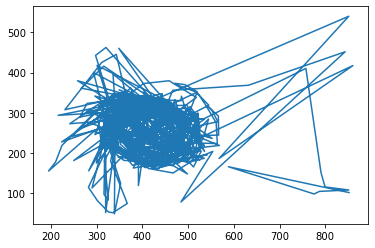

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
good_ind = final_xyconf[:,2] > 0.4
plt.plot(final_xyconf[good_ind,0], final_xyconf[good_ind, 1])

# Look at the 3d dataframe (feature-tracker style)

In [ ]:
import pandas as pd
from deeplabcut.generate_training_dataset.trainingsetmanipulation import merge_annotateddatasets
from deeplabcut import auxiliaryfunctions
from pathlib import Path
import os
%load_ext autoreload
%autoreload 2

In [ ]:
from DLC_for_WBFM.utils.feature_detection.visualize_using_dlc import build_subset_df
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import plot_tracklet_covering

In [ ]:
# fname = r'C:\Users\charles.fieseler\Documents\Current_work\DLC_for_WBFM\DLC_for_WBFM\scratch\Charlie-test-2021_04_14\2-training_data\raw\clust_df_dat.pickle'
fname = r'Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-2021_05_11\2-training_data\raw\clust_df_dat.pickle'

df = pd.read_pickle(fname)

In [ ]:
%matplotlib inline
plot_tracklet_covering(df, 30);

In [ ]:
subset_df_vec = [build_subset_df(df, list(range(380,411)), which_z=z) for z in range(32)]
# z = 1
# subset_df = build_subset_df(df, list(range(380,411)), which_z=z, verbose=1)

In [ ]:
all_len = [len(d) for d in subset_df_vec]
sum(all_len)

# Look at the 2d dataframe (dlc-style)

In [ ]:
fname = r'C:/Users/charles.fieseler/Documents/Current_work/DLC_for_WBFM/DLC_for_WBFM/scratch/Charlie-test-2021_04_14/3-tracking/C-c5-C-2021-04-19/labeled-data/center5/CollectedData_C.h5'
df = pd.read_hdf(fname, "df_with_missing")
df['C']

In [ ]:
# Must be a problem with the merging...
cfg = auxiliaryfunctions.read_config(this_dlc_config)
project_path = 'C:\\Users\\charles.fieseler\\Documents\\Current_work\\DLC_for_WBFM\\DLC_for_WBFM\\scratch\\Charlie-test-2021_04_14\\3-tracking\\C-c5-C-2021-04-19'
trainingsetfolder = Path('training-datasets/iteration-0/UnaugmentedDataSet_C-c5Apr19')
fname = Path(os.path.join(project_path, trainingsetfolder))
windows2linux = False

Data = merge_annotateddatasets(cfg, fname, windows2linux)

In [ ]:
cfg["bodyparts"]

# Step 3: Does the training work?

# 3a: make the projects

In [1]:
# Try to train
# from DLC_for_WBFM.utils.preprocessing.DLC_utils import train_all_dlc_from_config, update_pose_config
from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from pathlib import Path
from DLC_for_WBFM.utils.pipeline.dlc_pipeline import create_dlc_training_from_tracklets

In [2]:
project_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-immobilized-long/project_config.yaml'
project_cfg = load_config(project_fname)
track_fname = project_cfg['subfolder_configs']['tracking']
track_fname = Path(project_fname).parent.joinpath(track_fname)
tracking_cfg = load_config(track_fname)


In [3]:

vid_fname = project_cfg['red_bigtiff_fname']
this_config = tracking_cfg.copy()
this_config['dataset_params'] = project_cfg['dataset_params'].copy()

opt = {}
opt['scorer'] = project_cfg['experimenter']
opt['task_name'] = project_cfg['experimenter']
opt['verbose'] = project_cfg['other']['verbose']
opt['DEBUG'] = False

with safe_cd(Path(project_fname).parent):
    create_dlc_training_from_tracklets(vid_fname, this_config, **opt)

Best covering starts at volume 28 with 104 tracklets
Making videos for all centers: [10, 15, 20]
Using video at: 3-tracking\center10.avi
Using video at: 3-tracking\center15.avi
Using video at: 3-tracking\center20.avi
All required videos exist; no preprocessing necessary
Created "\\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\C-c10-C-2021-05-28\videos"
Created "\\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\C-c10-C-2021-05-28\labeled-data"
Created "\\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\C-c10-C-2021-05-28\training-datasets"
Created "\\storage.imp.ac.at\groups\zimmer\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\C-c10-C-2021-05-28\dlc-models"
Copying the videos
104 tracklets overlap in time
49 tracklets overlap in z
Keeping 17/327 tracklets


C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\deeplabcut\create_project\new.py:175: UserWarning: No valid videos were found. The project was not created... Verify the video files and re-create the project.
  "No valid videos were found. The project was not created... "


FileNotFoundError: Config file is not found. Please make sure that the file exists and/or that you passed the path of the config file correctly!

In [4]:
%debug

> c:\users\charles.fieseler\anaconda3\envs\dlc-for-wbfm\lib\site-packages\deeplabcut\utils\auxiliaryfunctions.py(188)read_config()
    186     else:
    187         raise FileNotFoundError(
--> 188             "Config file is not found. Please make sure that the file exists and/or that you passed the path of the config file correctly!"
    189         )
    190     return cfg

ipdb> 
ipdb> u
> c:\users\charles.fieseler\documents\current_work\dlc_for_wbfm\dlc_for_wbfm\utils\preprocessing\dlc_utils.py(84)build_png_training_data()
     82 
     83     # Open video
---> 84     cfg = auxiliaryfunctions.read_config(dlc_config)
     85     videos = cfg.get("video_sets_original") or cfg["video_sets"]
     86     assert len(videos) == 1, "Only supports a single video"

ipdb> u
> c:\users\charles.fieseler\documents\current_work\dlc_for_wbfm\dlc_for_wbfm\utils\preprocessing\dlc_utils.py(245)training_data_from_annotations()
    243     png_opt = {'dlc_config': dlc_config_fname,
    244            

In [ ]:
# Try to train
# from DLC_for_WBFM.utils.preprocessing.DLC_utils import train_all_dlc_from_config, update_pose_config
from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from pathlib import Path

In [ ]:
project_fname = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\project_config.yaml'
project_cfg = load_config(project_fname)
track_fname = project_cfg['subfolder_configs']['tracking']
track_fname = Path(project_fname).parent.joinpath(track_fname)
track_cfg = load_config(track_fname)


In [ ]:
project_dir = Path(project_fname).parent
with safe_cd(project_dir):
    for dlc_config in track_cfg['dlc_projects']['all_configs']:
        print(dlc_config)
        update_pose_config(dlc_config, DEBUG=False)
    train_all_dlc_from_config(track_cfg)

In [ ]:
import deeplabcut
deeplabcut.evaluate_network(dlc_config)

In [ ]:
dlc_cfg = deeplabcut.auxiliaryfunctions.read_config(dlc_config)
vid_name = list(dlc_cfg['video_sets'].keys())[0]
deeplabcut.analyze_videos(dlc_config, vid_name)

In [ ]:
# dlc_cfg = deeplabcut.auxiliaryfunctions.read_config(dlc_config)
# vid_name = list(dlc_cfg['video_sets'].keys())[0]
deeplabcut.create_labeled_video(dlc_config, vid_name)

# Can I get the analysis in a loop?

In [ ]:
project_fname = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\project_config.yaml'
project_cfg = load_config(project_fname)
track_fname = project_cfg['subfolder_configs']['tracking']
track_fname = Path(project_fname).parent.joinpath(track_fname)
track_cfg = load_config(track_fname)


In [ ]:
project_dir = Path(project_fname).parent
with safe_cd(project_dir):
    for dlc_config in track_cfg['dlc_projects']['all_configs']:
        print(dlc_config)
        dlc_cfg = auxiliaryfunctions.read_config(dlc_config)
        video_list = list(dlc_cfg['video_sets'].keys())
        vname = video_list[0]
        destfolder = str(Path(vname).parent)
        scorer = dlc_cfg['scorer']
        DLCscorer = deeplabcut.analyze_videos(dlc_config, video_list)
        print(DLCscorer)
        vname = video_list[0]
        destdir = str(Path(vname).parent)
#         scorer = dlc_cfg['scorer']
        df, _, _, _ = auxiliaryfunctions.load_analyzed_data(
                    destdir, Path(vname).name, DLCscorer
                )
        

In [ ]:
import os

In [ ]:
from DLC_for_WBFM.utils.preprocessing.DLC_utils import get_z_from_dlc_name

In [ ]:
get_z_from_dlc_name(dlc_config)

In [ ]:
%debug

# Step 3c: making tracks

In [ ]:
%load_ext autoreload
%autoreload 2
from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from DLC_for_WBFM.utils.pipeline.dlc_pipeline import make_3d_tracks_from_stack
from pathlib import Path
import pandas as pd


In [ ]:
# proj_fname = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\project_config.yaml'
proj_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-immobilized-2021_05_11/project_config.yaml'
proj_cfg = load_config(proj_fname)
proj_dir = Path(proj_fname).parent
with safe_cd(proj_dir):
    track_cfg = load_config(proj_cfg['subfolder_configs']['tracking'])
#     df = pd.read_hdf(track_cfg['final_3d_tracks']['df_fname'])

In [ ]:
# Debug the track function
with safe_cd(proj_dir):
    make_3d_tracks_from_stack(track_cfg, DEBUG=True)

In [ ]:

with safe_cd(proj_dir):
    track_cfg = load_config(proj_cfg['subfolder_configs']['tracking'])
    fname = track_cfg['final_3d_tracks']['df_fname']
fname

In [ ]:
with safe_cd(proj_dir):
    df = pd.read_hdf(fname)
df

In [ ]:
# Examples to get the concat right
# fname = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\3-tracking\C-c10-C-2021-04-20\videos\center10DLC_resnet_50_C-c10Apr20shuffle1_50000.h5'
# scorer = 'DLC_resnet_50_C-c10Apr20shuffle1_50000'
# df0 = pd.read_hdf(fname)[scorer]
# fname = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\3-tracking\C-c12-C-2021-04-20\videos\center12DLC_resnet_50_C-c12Apr20shuffle1_50000.h5'
# scorer = 'DLC_resnet_50_C-c12Apr20shuffle1_50000'
# df1 = pd.read_hdf(fname)[scorer]

In [ ]:
# df_all = pd.concat([df0, df1], axis=1)
# df_all

In [ ]:
# df0['neuron512','z'] = 1

In [ ]:
# df0.sort_values('bodyparts', axis=1, inplace=True)
# df0

# Step 4: Get traces

In [1]:
%load_ext autoreload
%autoreload 2
from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from DLC_for_WBFM.utils.pipeline.traces_pipeline import get_traces_from_3d_tracks
from pathlib import Path
import pandas as pd
import pickle, os
from DLC_for_WBFM.utils.visualization.plot_traces import make_grid_plot_from_project

In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

In [3]:
# proj_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-gfp-long/project_config.yaml'
# proj_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-worm3-long/project_config.yaml'
proj_fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\project_config.yaml"

proj_cfg = load_config(proj_fname)
proj_dir = Path(proj_fname).parent
with safe_cd(proj_dir):
    track_cfg = load_config(proj_cfg['subfolder_configs']['tracking'])
    segment_cfg = load_config(proj_cfg['subfolder_configs']['segmentation'])
    traces_cfg = load_config(proj_cfg['subfolder_configs']['traces'])
    
#     m_fname = os.path.join('1-segmentation', 'metadata_3000.pickle')
#     with open(m_fname, 'rb') as f:
#         segmentation_metadata = pickle.load(f)
    
# with safe_cd(proj_dir):
#     get_traces_from_3d_tracks(segment_cfg,
#                               track_cfg,
#                               traces_cfg,
#                               proj_cfg,
#                               DEBUG=False)

Read traces from: 4-traces\green_traces.h5
Found 103 neurons; shaping to grid of shape (26, 4)


0it [00:00, ?it/s]

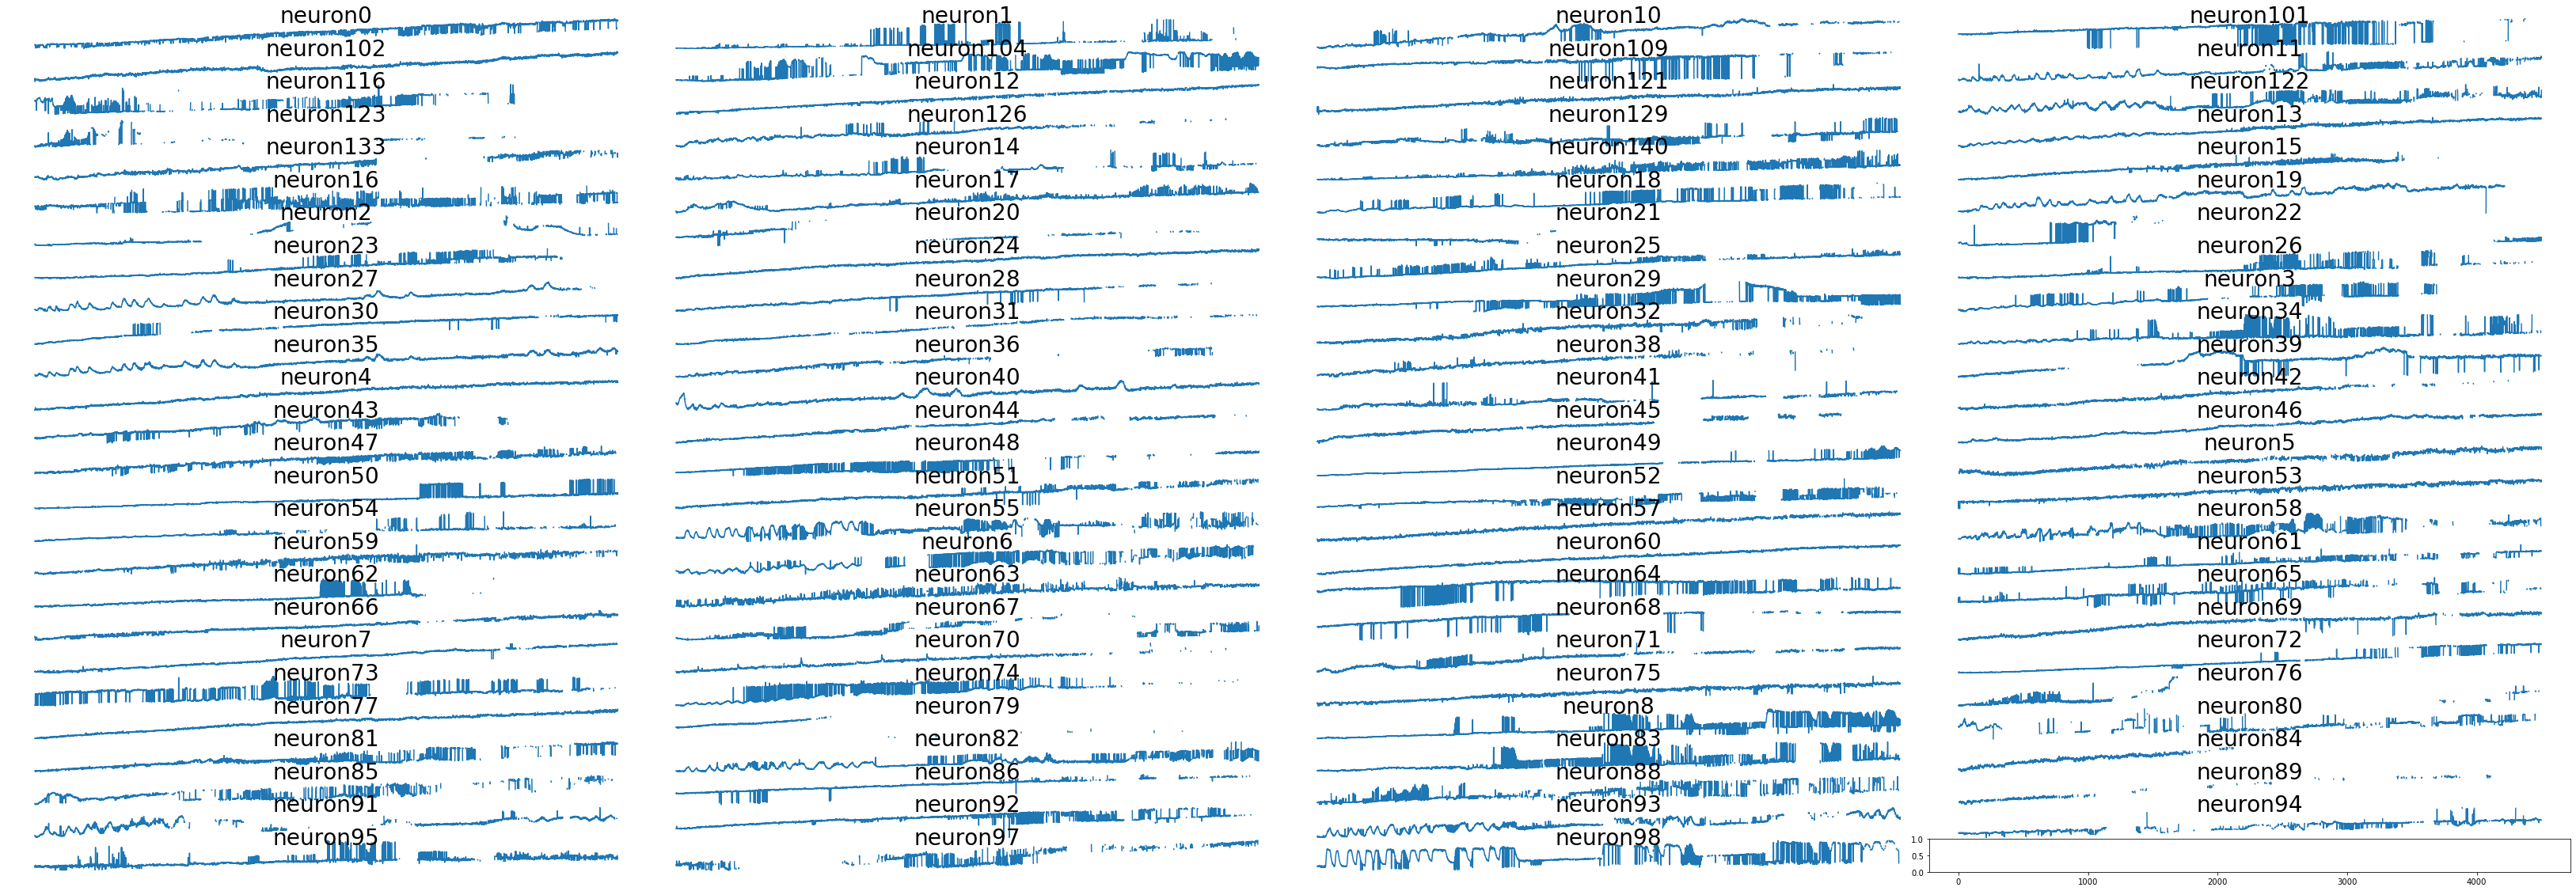

In [53]:
%matplotlib inline
proj_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-immobilized-long/project_config.yaml'
# proj_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-gfp-long/project_config.yaml'
# proj_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-worm3-long/project_config.yaml'

proj_cfg = load_config(proj_fname)
proj_dir = Path(proj_fname).parent

from scipy.ndimage.filters import uniform_filter1d
N = 5
def my_filter(x):
    nans = np.isnan(x)
    replaced = np.where(nans, 1.0, x)
    x_filtered = uniform_filter1d(replaced, size=N)
    x_with_nans_back = np.where(nans, np.nan, x_filtered)
    return x_with_nans_back

with safe_cd(proj_dir):
    make_grid_plot_from_project('', 'ratio', do_df_over_f0=False)
#     make_grid_plot_from_project('', 'ratio', do_df_over_f0=False, smoothing_func=my_filter)

# Visualize the matches

In [30]:
from DLC_for_WBFM.utils.visualization.visualization_tracks import visualize_tracks
from tqdm.auto import tqdm
import pickle
import pandas as pd
import numpy as np
import open3d as o3d
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\4-traces\all_matches.pickle"
with open(fname, 'rb') as f:
    all_matches = pickle.load(f)

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\4-traces\red_traces.h5"
red_traces = pd.read_hdf(fname)

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\4-traces\green_traces.h5"
green_traces = pd.read_hdf(fname)

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\full_3d_tracks.h5"
dlc_tracks = pd.read_hdf(fname)

In [31]:
all_frames_seg = []
all_frames_dlc = []
all_frames_matches = []

neuron_names_red = red_traces.columns.levels[0]
neuron_names_dlc = dlc_tracks.columns.levels[0]

for i_frame in tqdm(range(len(red_traces))):
    this_frames_seg, this_frames_dlc = [], []
    for name_red, name_dlc in zip(neuron_names_red, neuron_names_dlc):
        coords = ['z_seg', 'x_seg', 'y_seg']
        this_frames_seg.append(np.array(red_traces[name_red].loc[i_frame, coords]))
        
        # Are the red_traces.h5 tracks different from the dlc h5 file?
        coords = ['z', 'y', 'x']
        this_frames_dlc.append(np.array(dlc_tracks[name_dlc].loc[i_frame, coords]))
        
#         coords = ['z_dlc', 'x_dlc', 'y_dlc']
#         this_frames_dlc.append(np.array(red_traces[name].loc[i_frame, coords]))
    all_frames_seg.append(np.vstack(this_frames_seg))
    all_frames_dlc.append(np.vstack(this_frames_dlc))
    all_frames_matches.append([[i, i] for i in range(len(this_frames_dlc))])
    
    if i_frame > 30:
        break

  0%|          | 0/4500 [00:00<?, ?it/s]

In [33]:
i = 1
neurons0, neurons1 = all_frames_seg[i], all_frames_dlc[i]
matches = all_frames_matches[i]
visualize_tracks(neurons0, neurons1, matches)

[LineSet with 102 lines.,
 PointCloud with 103 points.,
 PointCloud with 103 points.]

## Visualize the matches within a cloud of all segmentations

In [5]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\1-segmentation\metadata_4500.pickle"
with open(fname, 'rb') as f:
    seg_metadata = pickle.load(f)

In [6]:
all_frames_raw_seg = []
for i_frame in tqdm(range(len(red_traces))):
    this_seg = []
    this_dat = seg_metadata[i_frame]
#     for _, row in this_dat.iterrows():
#         this_seg.append(np.array(df_neuron['centroids']))
#     all_frames_raw_seg.append(np.vstack(this_dat['centroids'].apply(pd.to_numeric)))
    all_frames_raw_seg.append(np.array([np.asarray(row) for row in this_dat['centroids']]))
    if i_frame > 10:
        break

  0%|          | 0/4500 [00:00<?, ?it/s]

In [7]:
i = 1
neurons0, neurons1 = all_frames_seg[i], all_frames_dlc[i]
matches = all_frames_matches[i]
sets_to_draw = visualize_tracks(neurons0, neurons1, matches, to_plot=False)

all_seg_raw = all_frames_raw_seg[i]
all_seg_pc = o3d.geometry.PointCloud()
all_seg_pc.points = o3d.utility.Vector3dVector(all_seg_raw)

sets_to_draw.append(all_seg_pc)
o3d.visualization.draw_geometries(sets_to_draw)

### Use the matching function to recalculate the matches

In [10]:
from DLC_for_WBFM.utils.feature_detection.utils_networkx import calc_bipartite_from_distance

In [11]:
zxy_dlc = all_frames_dlc[i]
# zxy_dlc = np.reshape(zxy_dlc[~np.isnan(zxy_dlc)], (-1,3))
zxy_seg = all_frames_raw_seg[i]

z_to_xy_ratio = 1.0
zxy_seg[:, 0] *= z_to_xy_ratio
zxy_dlc[:, 0] *= z_to_xy_ratio

max_dist = 20.0

In [18]:
matches_redo, conf, raw_matches = calc_bipartite_from_distance(zxy_dlc, zxy_seg, max_dist=20.0)
sets_to_draw = visualize_tracks(zxy_dlc, zxy_seg, raw_matches, to_plot=True)

In [17]:
sets_to_draw = visualize_tracks(zxy_dlc, zxy_seg, matches_redo, to_plot=False)

NameError: name 'matches_redo' is not defined

In [263]:
ind = np.argsort(conf, axis=0)
# bad_matches = np.vstack([conf[i][0] for i in ind[:5]])
bad_matches = ind[2]

In [16]:
bad_dlc = zxy_dlc[matches_redo[bad_matches,0],:]
bad_seg = zxy_seg[matches_redo[bad_matches,1],:]

bad_match_pcs = visualize_tracks(bad_dlc, bad_seg, [[0,0]], to_plot=False, to_plot_failed_lines=True)
# bad_match_pcs = visualize_tracks(bad_dlc, bad_seg, [[0,0], [1,1]], to_plot=False, to_plot_failed_lines=True)
[pc.paint_uniform_color([1,0,0]) for pc in bad_match_pcs]
bad_match_pcs[2] = bad_match_pcs[2].translate([0.5,0,0])
bad_match_pcs[3] = bad_match_pcs[3].translate([0.5,0,0])

sets_to_draw.extend(bad_match_pcs)

NameError: name 'matches_redo' is not defined

In [266]:

# o3d.visualization.draw_geometries(sets_to_draw)

In [267]:
matches_redo[bad_matches,:]

array([[82, 51]], dtype=int64)

In [268]:
from scipy.optimize import linear_sum_assignment
from scipy.spatial.distance import cdist

cost_matrix = cdist(np.array(zxy_dlc), np.array(zxy_seg), 'euclidean')
matches = linear_sum_assignment(cost_matrix)
raw_matches = [[m0, m1] for (m0, m1) in zip(matches[0], matches[1])]

## Match greedily instead (ICP)

In [8]:
from DLC_for_WBFM.utils.visualization.visualization_tracks import draw_registration_result, visualize_tracks_simple

In [12]:

dlc_pc = o3d.geometry.PointCloud()
dlc_pc.points = o3d.utility.Vector3dVector(zxy_dlc)
seg_pc = o3d.geometry.PointCloud()
seg_pc.points = o3d.utility.Vector3dVector(zxy_seg)

opt = {'max_correspondence_distance': 5.0}
reg = o3d.pipelines.registration.registration_icp(dlc_pc, seg_pc, **opt)

In [13]:
visualize_tracks_simple(dlc_pc, seg_pc, reg.correspondence_set)

LineSet with 99 lines.

In [24]:
all_diffs = []
for m in reg.correspondence_set:
    all_diffs.append(zxy_dlc[m[0],...] - zxy_seg[m[1],...])
all_diffs = np.array(all_diffs)

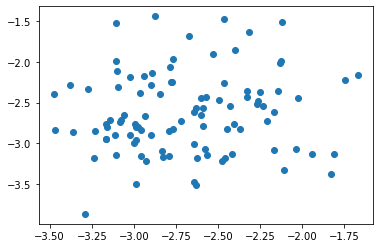

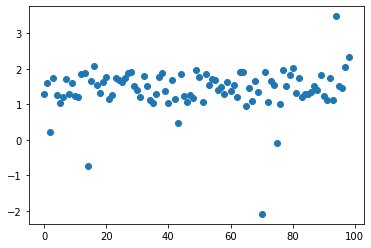

In [29]:
import matplotlib.pyplot as plt
plt.plot(all_diffs[:,1], all_diffs[:,2], 'o')
plt.figure()
plt.plot(all_diffs[:,0], 'o')

In [35]:
zxy_dlc

array([[ 17.        ,  71.88019097,  45.35685409],
       [ 18.        , 101.58312989, 218.57410074],
       [ 18.        ,  39.10587311, 140.32243297],
       [  9.        ,  64.62397079,  94.10521123],
       [ 23.        ,  95.65480361,  86.44873328],
       [  8.        ,  55.97657498, 212.93417256],
       [ 10.        ,  67.40703316, 111.21044383],
       [ 11.        ,  51.74554045, 172.64705718],
       [ 14.        ,  32.76629332, 186.5826958 ],
       [ 22.        ,  78.04787048,  52.07255825],
       [ 14.        ,  70.30033142,   4.49094679],
       [ 11.        ,  73.43058478, 202.46910151],
       [ 14.        ,  34.93087231, 196.57664567],
       [ 24.        ,  49.45492921, 135.20745342],
       [ 17.        , 116.28758166, 262.72221023],
       [ 12.        ,  79.5917622 , 124.20415809],
       [ 10.        ,  43.4942409 , 187.85252073],
       [ 17.        , 108.61911506, 228.77544547],
       [ 16.        ,  97.97186433, 203.2041034 ],
       [ 17.        ,  95.19052

# Look at the traces directly

In [ ]:
import pickle
import matplotlib.pyplot as plt

In [ ]:
proj_fname = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\project_config.yaml'
proj_cfg = load_config(proj_fname)
proj_dir = Path(proj_fname).parent
with safe_cd(proj_dir):
    traces_cfg = load_config(proj_cfg['subfolder_configs']['traces'])
    df = pd.read_hdf(traces_cfg['traces']['red'])
    track_cfg = load_config(proj_cfg['subfolder_configs']['tracking'])
    df_dlc = pd.read_hdf(track_cfg['final_3d_tracks']['df_fname'])

In [ ]:
%matplotlib inline
name = 'neuron0'
plt.plot(df[name, 'brightness'] / df[name, 'volume'])
# df

In [ ]:
plt.plot(df['neuron0']['x_dlc'], df['neuron0']['y_dlc'], 'o')

In [ ]:
name = 'neuron3'
plt.plot(df[name]['x_dlc'], df[name]['y_dlc'], 'o', label='dlc')
plt.plot(df[name]['x_seg'], df[name]['y_seg'], 'o', label='segmentation')
plt.legend()
plt.title(f"xy locations for {name}")

In [ ]:
name = 'neuron0'
plt.plot(df[name]['z_seg'], label='segmentation')
plt.plot(df[name]['z_dlc'], label='dlc')
plt.legend()
plt.title(f"Z values for different trackers for {name}")

In [ ]:
name = 'neuron3'
plt.plot(df[name]['z_seg'], label='segmentation')
plt.plot(max(df[name]['z_seg'])*df_dlc[name]['likelihood'], label='dlc confidence')
plt.legend()
plt.title(f"Z values and confidence for {name}")

# Postprocessing: reindex the segmented masks

In [29]:
%load_ext autoreload
%autoreload 2
from DLC_for_WBFM.utils.projects.utils_project import load_config, safe_cd
from DLC_for_WBFM.utils.pipeline.dlc_pipeline import make_3d_tracks_from_stack
from pathlib import Path
import pandas as pd
from DLC_for_WBFM.utils.visualization.utils_segmentation import reindex_segmentation
import zarr, napari

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# proj_fname = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\project_config.yaml'
proj_fname = r'Y:/shared_projects/wbfm/dlc_stacks/Charlie-immobilized-2021_05_11/project_config.yaml'
proj_cfg = load_config(proj_fname)
proj_dir = Path(proj_fname).parent
with safe_cd(proj_dir):
    track_cfg = load_config(proj_cfg['subfolder_configs']['tracking'])
#     df = pd.read_hdf(track_cfg['final_3d_tracks']['df_fname'])

In [46]:
reindex_segmentation(proj_fname)

Saving masks at 4-traces\reindexed_masks.zarr


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

In [30]:
with safe_cd(proj_dir):
    z = zarr.open(r'4-traces\reindexed_masks.zarr')

In [45]:
%debug

> c:\users\charles.fieseler\documents\current_work\dlc_for_wbfm\dlc_for_wbfm\utils\visualization\utils_segmentation.py(45)reindex_segmentation()
     43         all_lut[i_volume] = lut
     44 
---> 45     err
     46     # Apply lookup tables to each volume
     47     # Also see link for ways to speed this up:

ipdb> len(all_lut)
500
ipdb> q


In [37]:
with safe_cd(proj_dir):
    df_m = pd.read_pickle('4-traces/all_matches.pickle')

In [39]:
# df_m

# cropping practice

In [ ]:
fname = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\1-segmentation\masks_500.btf'

In [ ]:
from DLC_for_WBFM.utils.video_and_data_conversion.import_video_as_array import get_single_volume
import numpy as np
from DLC_for_WBFM.utils.postprocessing.base_cropping_utils import get_crop_coords3d
from DLC_for_WBFM.gui.utils_gui import get_cropped_frame

In [ ]:
dat = get_single_volume(fname, 1, 33)
dat.shape

In [ ]:
out = get_cropped_frame(fname, 1, 33, (10,100,100), (1,28,28))

# Point clouds for the seg-dlc tracking

In [ ]:
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import visualize_tracks
proj_fname = r'C:\Users\charles.fieseler\dlc\Charlie-test-2021_04_14\project_config.yaml'
proj_cfg = load_config(proj_fname)
proj_dir = Path(proj_fname).parent
with safe_cd(proj_dir):
    traces_cfg = load_config(proj_cfg['subfolder_configs']['traces'])
    segment_cfg = load_config(proj_cfg['subfolder_configs']['segmentation'])
    df = pd.read_hdf(traces_cfg['traces']['red'])
    
    with open(traces_cfg['all_matches'], 'rb') as f:
        matches = pickle.load(f)
    
    with open(segment_cfg['output']['metadata'], 'rb') as f:
        seg_mdata = pickle.load(f)

## Plot just the matches

In [ ]:
n = 'neuron0'
t = 101
coords = ['z', 'x', 'y']
zxy_seg, zxy_dlc = [], []
m = []
for i, n in enumerate(df.columns.levels[0]):
    zxy_seg.append([df[n][c+"_seg"].loc[t] for c in coords])
    zxy_dlc.append([df[n][c+"_dlc"].loc[t] for c in coords])
    m.append([i, i])
# m = matches[t]
# m = np.array([m0[0] for m0 in m]) # TODO: fix this in the file writing

In [ ]:
visualize_tracks(np.array(zxy_seg), np.array(zxy_dlc), m)

## Plot the rest of the segmented points too

In [ ]:
t = 104
coords = ['z', 'x', 'y']
zxy_seg = seg_mdata[t]['centroids']
zxy_seg = np.array([np.array(x) for x in zxy_seg])
zxy_dlc = []
m = []
for i, n in enumerate(df.columns.levels[0]):
    zxy_dlc.append([df[n][c+"_dlc"].loc[t] for c in coords])
m = matches[t]
m = np.array([m0[0] for m0 in m]) # TODO: fix this in the file writing

In [ ]:
visualize_tracks(np.array(zxy_dlc), np.array(zxy_seg), m)

# Look at zarr files

In [20]:
import zarr, napari
import numpy as np

In [26]:
fname = r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2bigtiff.zarr"
z = zarr.open(fname)

In [29]:
np.max(z[200,...])

174

In [27]:
napari.view_image(z)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 349.5, 449.5), zoom=1.25035765379113, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(0.0, 0.0, 0.0, 0.0), scaled=True, size=1, style='standard'), dims=Dims(ndim=4, ndisplay=2, last_used=3, range=((0.0, 1499.0, 1.0), (0.0, 31.0, 1.0), (0.0, 699.0, 1.0), (0.0, 899.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(enabled=False, stride=1, shape=(-1, -1)), layers=[<Image layer 'z' at 0x1d98ce9df88>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position='bottom_right', font_size=10.0, unit=None), text_overlay=TextOverlay(visible=False, color=array([1., 1., 1., 1.]), font_size=10.0, position='top_left', text=''), help='', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='napari', mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_wheel_

In [1]:
import zarr, napari
# Look at immobilized
red_fname = r"D:\freely_immobilized\ZIM2051_trial_21_HEAD_mcherry_FULL_bigtiff.zarr"
z_red = zarr.open(red_fname)

green_fname = r"D:\freely_immobilized\ZIM2051_trial_21_HEAD_gcamp_FULL_bigtiff.zarr"
z_green = zarr.open(green_fname)

seg_from_tracks = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\segmentation_from_tracking.zarr"
z_track = zarr.open(seg_from_tracks)

seg_raw = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\1-segmentation\masks_4500.zarr"
z_seg = zarr.open(seg_raw)

seg_raw2d = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\1-segmentation\masks_4500_2d.zarr"
z_seg2 = zarr.open(seg_raw2d)

In [2]:
viewer = napari.view_image(z_red)
viewer.add_image(z_green)
viewer.add_labels(z_track)
viewer.add_labels(z_seg)
viewer.add_labels(z_seg2)

<Labels layer 'z_seg2' at 0x2198fa47e88>

In [82]:
import zarr, napari
import numpy as np
from DLC_for_WBFM.utils.video_and_data_conversion.import_video_as_array import get_single_volume

# Look at worm3
red_fname = r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1bigtiff.zarr"
z_red = zarr.open(red_fname)

green_fname = r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2bigtiff.zarr"
z_green = zarr.open(green_fname)

red_fname = r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1bigtiff.btf"
btf_red = get_single_volume(red_fname, 0, 32, alpha=0.15)

green_fname = r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2\2021-03-04_16-07-57_worm3_ZIM2051-channel-1-pco_camera2bigtiff.btf"
btf_green = get_single_volume(green_fname, 0, 32, alpha=0.15)

# seg_from_tracks = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\segmentation_from_tracking.zarr"
# z_track = zarr.open(seg_from_tracks)

# seg_raw = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\1-segmentation\masks_4500.zarr"
# z_seg = zarr.open(seg_raw)

# seg_raw2d = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\1-segmentation\masks_4500_2d.zarr"
# z_seg2 = zarr.open(seg_raw2d)

In [83]:
viewer = napari.view_image(z_red)
viewer.add_image(z_green)
# flipped_green = np.flip(np.array(z_green), axis=-1)
# viewer.add_image(flipped_green)
viewer.add_image(btf_red)
# viewer = napari.view_image(np.flip(btf_red, axis=2))
viewer.add_image(btf_green)

<Image layer 'btf_green' at 0x219a37f4c48>

In [79]:
fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-new-seg\before_flip.npy"
before_flip = np.load(fname)

fname = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-worm3-new-seg\after_flip.npy"
after_flip = np.load(fname)

In [80]:
v = napari.view_image(before_flip)
v.add_image(after_flip)
v.add_image(btf_green)

<Image layer 'btf_green' at 0x21998685988>

In [34]:
import pickle
with open(r"Y:\shared_projects\wbfm\dat\ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1\2021-03-04_16-07-57_worm3_ZIM2051-channel-0-pco_camera1bigtiff_preprocessed.pickle", 'rb') as f:
    dat = pickle.load(f)

In [35]:
from scipy.linalg import polar

for k, val in dat.items():
    R, K = polar(val)
    print(k, np.arctan(R[1,0] / R[0,0]))
#     print(k, np.arcsin(R[1,0] / R[0,0]))

(16, 15) -0.013772835400928737
(15, 14) 0.04209388855353921
(14, 13) 0.06950455265841785
(13, 12) 0.19103100766396722
(12, 11) 0.30839008701116427
(11, 10) -0.16866131924248184
(10, 9) -0.3827926448657667
(9, 8) -0.26146350546945846
(8, 7) -0.13700983080461604
(7, 6) -0.09569875726090597
(6, 5) -0.051896358150777804
(5, 4) -0.018469895576688794
(4, 3) 0.008348498031916932
(3, 2) 0.025019489781272143
(2, 1) 0.02708569304169419
(1, 0) 0.03930226259356701
(16, 17) 0.08444084093098345
(17, 18) 0.6719574746025031
(18, 19) 0.7953573261508365
(19, 20) 0.8397828626186408
(20, 21) 0.8676535478349726
(21, 22) 0.8844025634914618
(22, 23) 0.911374000040819
(23, 24) 0.9384263205610334
(24, 25) 0.955873604690755
(25, 26) 0.9667568888819917
(26, 27) 0.9790806664141457
(27, 28) 0.9898129575659179
(28, 29) 0.997174380164712
(29, 30) 0.9877993730243777
(30, 31) 0.9793645792082938


In [27]:
dat

{(15,
  16): array([[ 9.99999821e-01,  6.33506395e-04, -1.10429198e-01],
        [-6.33506395e-04,  9.99999821e-01, -2.50083566e-01]]),
 (14,
  15): array([[ 1.00000001e+00, -2.21255309e-04,  1.52595311e-01],
        [ 2.21255309e-04,  1.00000001e+00, -8.13809998e-01]]),
 (13,
  14): array([[ 9.99999619e-01, -8.88931531e-04,  2.30872436e-01],
        [ 8.88931531e-04,  9.99999619e-01, -1.28048581e+00]]),
 (12,
  13): array([[ 0.99999625, -0.0027387 ,  0.66096857],
        [ 0.0027387 ,  0.99999625, -1.5039714 ]]),
 (11,
  12): array([[ 0.999992  , -0.00400458,  1.26508251],
        [ 0.00400458,  0.999992  , -0.91875861]]),
 (10,
  11): array([[ 0.99999177, -0.00406379,  1.5625814 ],
        [ 0.00406379,  0.99999177,  0.34079581]]),
 (9,
  10): array([[ 0.99999659, -0.00261396,  1.63941813],
        [ 0.00261396,  0.99999659,  2.33353867]]),
 (8,
  9): array([[ 9.99999399e-01,  1.10727627e-03,  1.79798110e+00],
        [-1.10727627e-03,  9.99999399e-01,  5.47382448e+00]]),
 (7,
  8): 

# DLC video making

In [1]:
## DLC videos
import deeplabcut

path_config_file = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\C-c7-C-2021-06-18\config.yaml"
videofile_path = r"Y:\shared_projects\wbfm\dlc_stacks\Charlie-immobilized-long\3-tracking\C-c7-C-2021-06-18\videos\center7.avi"
deeplabcut.create_labeled_video(path_config_file,videofile_path)


In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\charles.fieseler\Anaconda3\envs\DLC-for-WBFM\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw